we use 175 abstracts here

In [1]:
from bertopic import BERTopic
with open('../bertopic_fun/review_abstract.txt','r') as f:
    docs = f.readlines()

/home/zhixue/anaconda3/envs/torchtext/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
model = BERTopic(language="english")
topics, probs = model.fit_transform(docs)

We extract 5 most frequent topics:

In [3]:
model.get_topic_freq().head(5)

,Topic,Count
0,-1,90
1,2,34
2,0,32
3,1,19


-1 refers to all outliers and should typically be ignored.
Let's take a look at the most frequent topic that was generated:

In [11]:
model.get_topic(1)[:10]

[('humor', 0.010897096001028369),
 ('returntowork', 0.006771636566630306),
 ('discrimination', 0.005977439290829127),
 ('pain', 0.005075241117389128),
 ('musculoskeletal', 0.0049451368464185136),
 ('psychosocial', 0.004889777038414597),
 ('psychological', 0.004789641101399976),
 ('intrinsic', 0.003698963889186122),
 ('bullying', 0.0036323653336761226),
 ('effortreward', 0.0036075415166245284)]

Note that the model is stocastich which means that the topics might differ across runs.


# **Visualize Topics**

In [27]:
model.visualize_topics()

# **Visualize Topic Probabilities**

The variable `probabilities` that is returned from `transform()` or `fit_transform()` can 
be used to understand how confident BERTopic is that certain topics can be found in a document. 

To visualize the distributions:

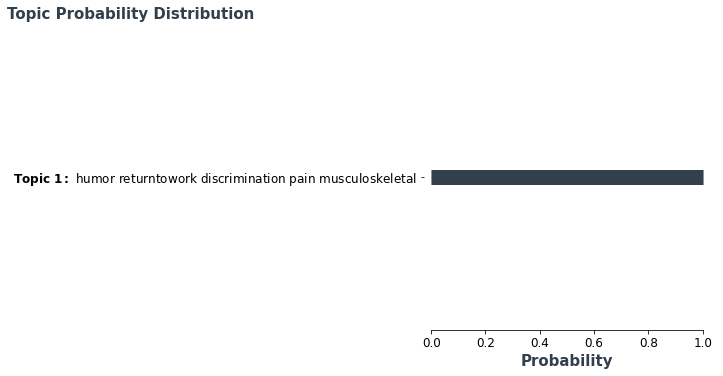

In [13]:
model.visualize_distribution(probs[0])

# **Topic Reduction**
we reduce the number of topics after having trained a BERTopic model.


In [29]:
new_topics, new_probs = model.reduce_topics(docs, topics, probs, nr_topics=60)


# **Topic Representation**
use the function `update_topics` to update
the topic representation with new parameters for `c-TF-IDF`: 


In [30]:
model.update_topics(docs, topics, n_gram_range=(1, 3), stop_words="english")

# **Search Topics**
Here, we search for topics that closely relate the
search term "depression". Then, we extract the most similar topic and check the results:

In [38]:
similar_topics, similarity = model.find_topics("work", top_n=5); similar_topics

[2, -1, 1, 0]

-1 refers to all outliers

In [41]:
model.get_topic(0)


[('depressive symptoms', 0.002387923003154948),
 ('symptoms', 0.0020007174485574793),
 ('odds ratio', 0.0019210951986571344),
 ('depressive', 0.0018614271576170213),
 ('disorders', 0.0017740383296249748),
 ('95 confidence interval', 0.001770030464883126),
 ('95 confidence', 0.001726638235739115),
 ('crisis', 0.0016735515204605795),
 ('restructuring', 0.001425452696531752),
 ('social enterprise', 0.001425452696531752)]

In [42]:
model.get_topic(1)

[('pulling', 0.0031705530453371134),
 ('pushing pulling', 0.0031705530453371134),
 ('discrimination', 0.003137291835880258),
 ('employment relations', 0.00289430067746659),
 ('occupational pushing pulling', 0.00289430067746659),
 ('occupational pushing', 0.00289430067746659),
 ('pushing pulling lbp', 0.0025996350710562307),
 ('pulling lbp', 0.0025996350710562307),
 ('musculoskeletal pain', 0.00248082915211422),
 ('workplace bullying', 0.002287137877909283)]

In [43]:
model.get_topic(2)



[('causation', 0.0019724279712889136),
 ('low', 0.0018111405713441486),
 ('jobrelated', 0.001760271144483068),
 ('workrelated', 0.0016937927201535067),
 ('fathers', 0.0016866718230114407),
 ('depressive disorders', 0.0016866718230114407),
 ('provide', 0.0015541985896045847),
 ('mortality', 0.0015397110000052894),
 ('systematically', 0.0015253662250880149),
 ('work participation', 0.0015109076093611955)]